In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## overfitting

In [4]:
x = np.random.rand(6)
y = np.random.rand(6)

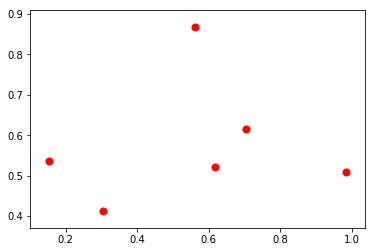

In [8]:
plt.scatter(x,y,c='r',s=50)

In [9]:
def myplot(n=1):
    plt.scatter(x, y, c='r', s=50)
    t = np.linspace(-0.2, 1.2, 1000)
    plt.plot(t, 0.5*np.sin(n*t) + 0.5)

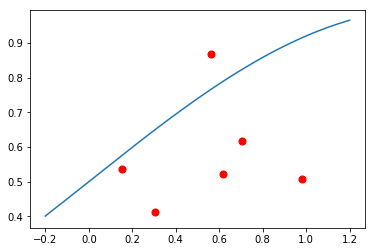

In [11]:
myplot(1)

In [12]:
from ipywidgets import interact

In [13]:
interact(myplot, n=(1, 200))

interactive(children=(IntSlider(value=1, description='n', max=200, min=1), Output()), _dom_classes=('widget-in…

<function __main__.myplot(n=1)>

## 線性迴歸

$$f(x) = 1.2x + 0.8 + \varepsilon$$

In [16]:
x = np.linspace(0, 5, 200)
y = 1.2*x + 0.8 + 0.3*np.random.randn(200)

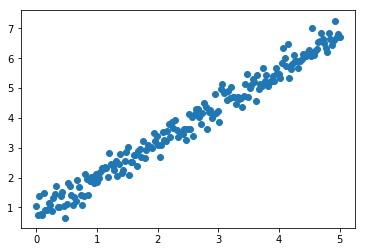

In [17]:
plt.scatter(x, y)

### 分訓練資料和測試資料

In [18]:
from sklearn.model_selection import train_test_split

#### 小重點

機器學習 (數據分析), 輸入資料是

$$[x_1, x_2, x_3, ....]$$

喜歡放成

$$[[x_1], [x_2], [x_3], ...]$$

意思就是說本來 n 維向量, 要變成 nx1

In [21]:
x.shape

(200,)

In [23]:
x = x.reshape(200,1)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.2,
                                                   random_state=0)

In [26]:
len(x_train)

160

In [27]:
len(x_test)

40

### 準備做線性迴歸

所有函數學習, 包括線性迴歸、機器學習、神經網路都是做三部曲:

1. 開一台函數學習機
2. 訓練
3. 預測

#### step 1. 建函數學習機

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()

#### step 2. 學習 (訓練)

In [30]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### step 3. 預測

In [32]:
model.predict([[10]])

array([12.91464897])

In [33]:
model.predict([[10], [5]])

array([12.91464897,  6.83472662])

In [36]:
y_predict = model.predict(x_test)

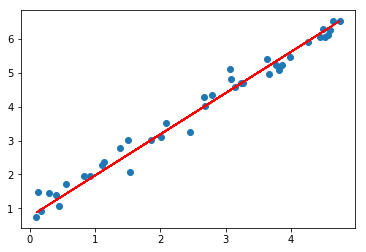

In [38]:
plt.scatter(x_test.ravel(), y_test)
plt.plot(x_test.ravel(), y_predict, 'r')

## 房價預測

In [39]:
from sklearn.datasets import load_boston

In [40]:
boston_dataset = load_boston()

In [41]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [42]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [43]:
len(boston_dataset.feature_names)

13

In [46]:
boston_dataset.data[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [47]:
boston = pd.DataFrame(boston_dataset.data,
                     columns=boston_dataset.feature_names)

In [48]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [50]:
boston['MEDV'] = boston_dataset.target

In [51]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [52]:
import seaborn as sns

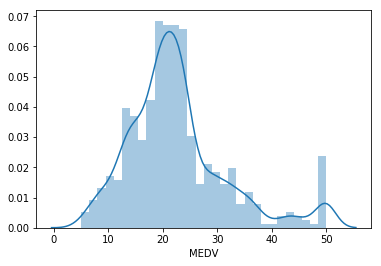

In [53]:
sns.distplot(boston.MEDV, bins=30)

### 準備訓練資料

In [54]:
X = boston.loc[:, "CRIM":"LSTAT"].values
Y = boston.MEDV

In [55]:
X[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size=0.2,
                                                   random_state=0)

In [57]:
len(x_train)

404

In [58]:
len(x_test)

102

### 數據分析三部曲

#### step 1. 開函數學習機

In [59]:
model = LinearRegression()

#### step 2. 訓練

In [60]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### step 3. 預測

In [61]:
y_predict = model.predict(x_test)

In [66]:
sns.set()

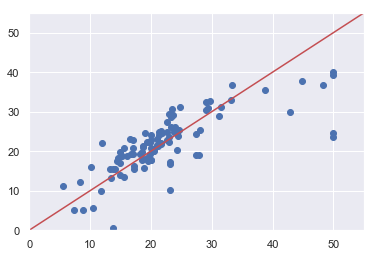

In [68]:
plt.scatter(y_test, y_predict)
plt.xlim(0,55)
plt.ylim(0,55)
plt.plot([0,55],[0,55],'r')

#### [指定作業]

房價資料不用所有的 feature 去預測。

In [69]:
x_train[87]

array([  5.58107,   0.     ,  18.1    ,   0.     ,   0.713  ,   6.436  ,
        87.9    ,   2.3158 ,  24.     , 666.     ,  20.2    , 100.19   ,
        16.22   ])

In [73]:
correlation_matrix = boston.corr().round(2)

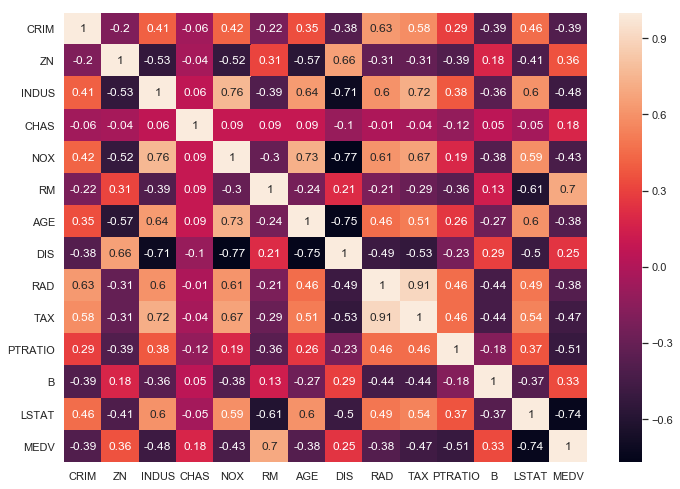

In [77]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})

sns.heatmap(correlation_matrix, annot=True)